## Mạng neuron tích chập


## Tích chập một chiều 


In [1]:
from __future__ import print_function, division
import numpy as np 
def conv1d(a, w, b = 0, stride = 1, pad = 0):
    """
    compute 1d convolutional (with bias)
    """
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width=pad, mode = 'constant', constant_values = 0)
    w_new = int((w_old - f + 2*pad)/stride) + 1 
    a_res = np.zeros((w_new))
    for i in range(w_new):
        start = i*stride
        end = start + f
        a_res[i] = np.sum(a_pad[start:end]*w) + b 
    return a_res 

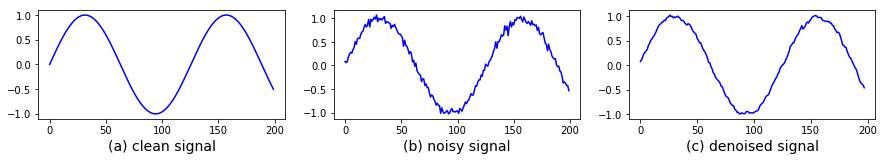

In [3]:
N = 200
x_clean = np.sin(np.arange(N)/20.)
x_noisy = x_clean + .05*np.random.randn(N)
w = 1./3*np.ones(3)
x_filtered = conv1d(x_noisy, w) 

from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (15, 2))
plt.subplot(131)
plt.plot(x_clean, 'b')
plt.xlabel('(a) clean signal', fontsize=14 )
# plt.axis('off')

plt.subplot(132)
plt.plot(x_noisy, 'b')
plt.xlabel('(b) noisy signal', fontsize=14 )
# plt.axis('off')
plt.subplot(133)
plt.plot(x_filtered, 'b')
plt.xlabel('(c) denoised signal', fontsize=14 )
fig.savefig('conv1d.png', bbox_inches='tight', dpi=600)
plt.show() 
# plt.axis('off')

## Convolutional 2d

In [10]:
def conv2d_11(A, W, b = 0, stride = 1, pad = 0):
    """
    A: input, A.shape = (n_H_old, n_W_old)
    W: filter, W.shape = (f, f)
    """
    n_H_old, n_W_old = A.shape
    f, f = W.shape
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute 
    for h in range(n_H_new):
        for v in range(n_W_new):
            h_start = h*stride 
            h_end = h_start + f
            v_start = v*stride 
            v_end = v_start + f
            A_res[h, v] = np.sum(A_pad[h_start:h_end, v_start:v_end] * W) + b 
    return A_res 


## Thêm nhiễu và khử nhiễu 

In [54]:
# add noise
import skimage
import skimage.io 
fn = 'mylady2'
img_rgb = skimage.io.imread(fn + '.jpg')
img_gray = (skimage.color.rgb2gray(img_rgb)*255).astype(np.int)


## Dò cạnh 

In [55]:
f = np.array([[-1, 0, 1], 
              [-1, 0, 1], 
              [-1, 0, 1]])
img_ver_edge = conv2d_11(img_gray, f)
# myshow(np.abs(conv2d(img_gray, f)))

In [56]:
f = np.array([[-1, -1, -1], 
              [0, 0, 0], 
              [1, 1, 1]])
# myshow(np.abs(conv2d(img_gray, f)))
img_hor_edge = conv2d_11(img_gray, f)

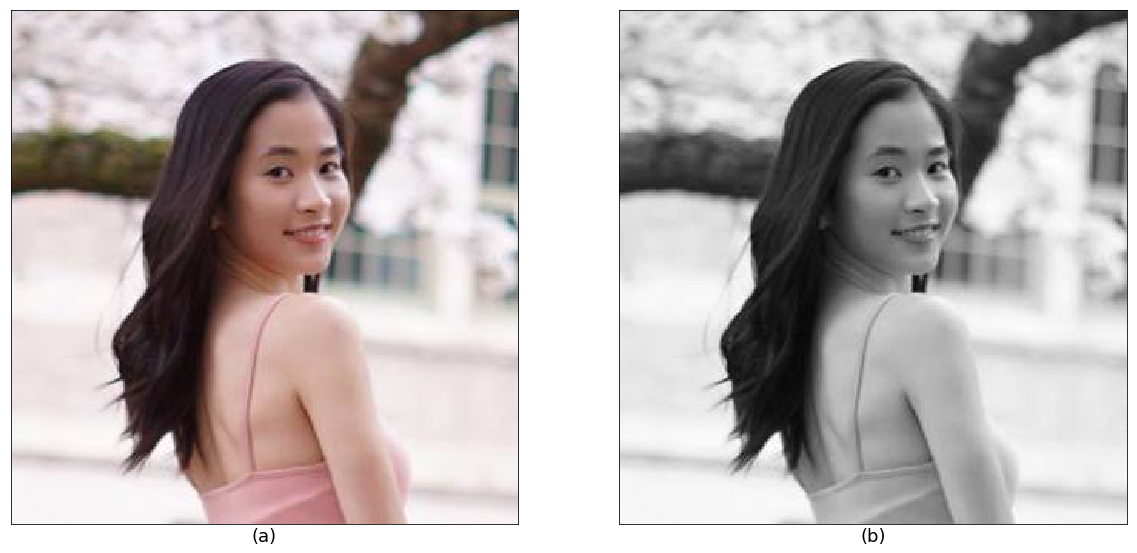

In [57]:

fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img_rgb, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)

plt.subplot(122)
plt.imshow(img_gray, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)


plt.show()

fig.savefig(fn + '_rgbgray.png', bbox_inches='tight', dpi = 600)

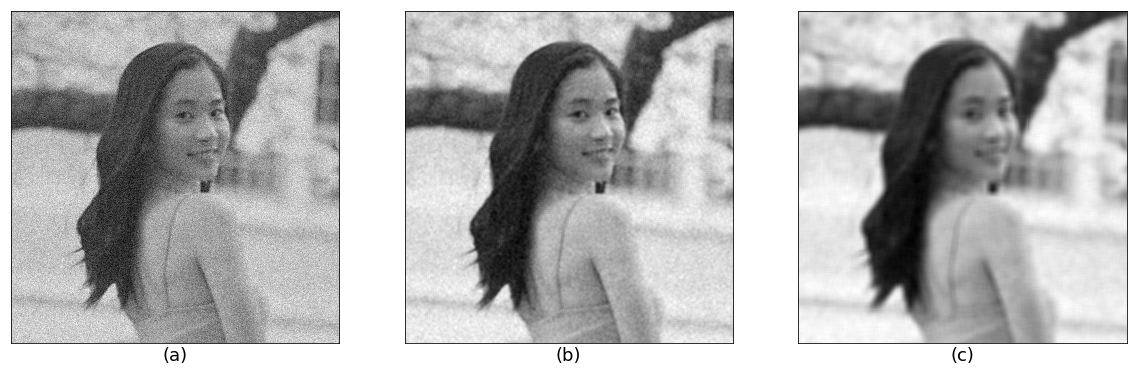

In [58]:
img_noisy = img_gray + np.random.randn(*img_gray.shape)*20
f = 3
w = 1./k**2*np.ones((f, f))
img_denoised = conv2d_11(img_noisy, w)

f = 7
w = 1./k**2*np.ones((f, f))
img_denoised_blurred = conv2d_11(img_noisy, w)

fig = plt.figure(figsize = (20, 10))
plt.subplot(131)
plt.imshow(img_noisy, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)

plt.subplot(132)
plt.imshow(img_denoised, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)

plt.subplot(133)
plt.imshow(img_denoised_blurred, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(c)', fontsize = 18)

plt.show()

fig.savefig(fn + '_denoise.png', bbox_inches='tight', dpi = 600)

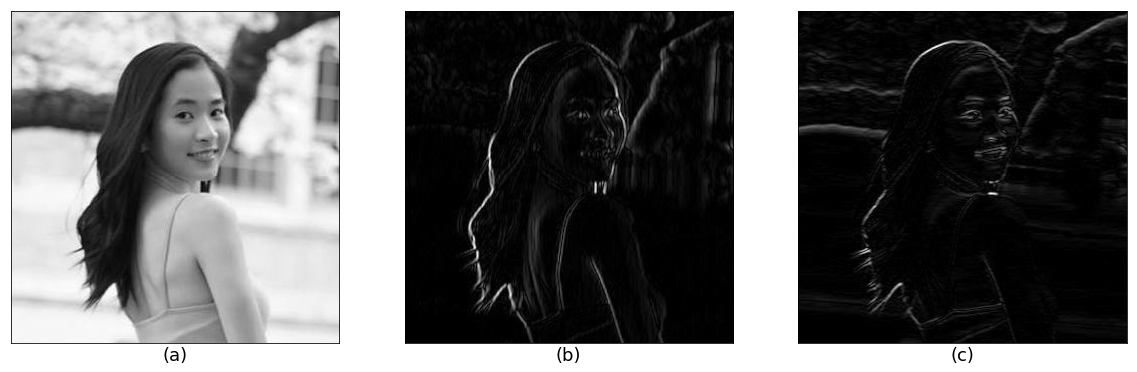

In [62]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(131)
plt.imshow(10*np.abs(img_gray), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)
plt.subplot(132)
plt.imshow(10*np.abs(img_ver_edge), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)

plt.subplot(133)
plt.imshow(10*np.abs(img_hor_edge), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(c)', fontsize = 18)
fig.savefig(fn + '_edge.png', bbox_inches='tight', dpi = 600)
plt.show() 

In [60]:
k = 7
f = 1./k**2*np.ones((k, k))
img_denoised_blurred = conv2d_11(img_noisy, f)

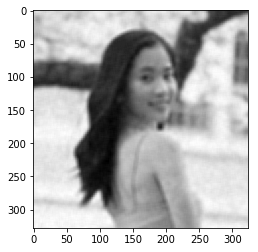

In [61]:
plt.imshow(img_denoised_blurred, 'gray')

In [46]:
f = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])/159.
# myshow(np.abs(conv2d(img_gray, f)))
img_canny_edge = conv2d_11(img_gray, f)


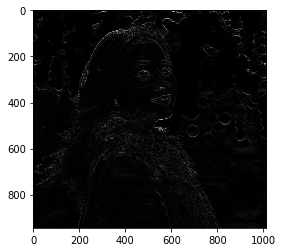

In [48]:
plt.imshow(np.abs(img_canny_edge), 'gray')
plt.show() 

# Đầu vào đa kênh 


## Tích chập với nhiều bộ lọc

In [344]:
def conv2d_1n(A, W, b, stride = 1, pad = 0):
    """
    A.shape = (n_H_old, n_W_old)
    W.shape = (f, f, n_C)
    b.shape = (n_C,)
    output.shape = (n_H_new, n_W_new, n_C)
    """
    n_H_old, n_W_old = A.shape 
    f, f, n_C = W.shape
    A_pad = np.pad(A, pad_width=pad, 
                   mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new, n_C))
    # compute 
    for c in range(n_C): 
        for h in range(n_H_new):
            for v in range(n_W_new):
                h_start = h*stride 
                h_end = h_start + f
                v_start = v*stride 
                v_end = v_start + f
                A_res[h, v, c] = np.sum(A_pad[h_start: h_end, v_start: v_end] * W[...,c]) + b[c]
    return A_res 

In [345]:
f = np.array([[[-1, 0, 1], 
               [-1, 0, 1], 
               [-1, 0, 1]],
              [[-1, -1, -1], 
               [0, 0, 0], 
               [1, 1, 1]]])
W = np.zeros((3, 3, 2))
W[:, :, 0] = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])
W[:, :, 1] = np.array([[-1, -1, -1], 
                       [0, 0, 0], 
                       [1, 1, 1]])
b = np.zeros(2)
img_2 = conv2d_1n(img_gray, W, b)


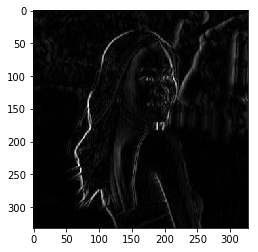

In [346]:
plt.imshow(np.abs(img_2[:, :, 0]), 'gray')
plt.show()

# Tích chập hai chiều tổng quát 

In [343]:
def conv2d(A, W, b, stride = 1, pad = 0):
    """
    A: input, A.shape = (m, n_H_prev, n_W_prev, n_C_prev)
    W: filters, W.shape = (f, f, n_C_prev, n_C)
    b: biases, b.shape = (n_C_new)
    """
    assert A.shape[3] == W.shape[2], 'input.shape[3] must == filters.shape[2]'
    m, n_H_prev, n_W_prev, _ = A.shape 
    f, _, n_C_prev, n_C = W.shape 
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_H_new = int((n_W_old - f + 2*pad)/stride) + 1 
    A_res = np.zeros((m, n_H_new, n_W_new, n_C))
    # compute 
    for i in range(m):
        for h in range(n_H_new): 
            for w in range(n_W_new):
                for c in range(n_C):
                    h_start = h*stride 
                    h_end = h_start + f
                    v_start = v*stride 
                    v_end = v_start + f
                    a_slide = A_pad[i, h_start: h_end, v_start:v_end, :]
                    A_res[i, h, w, c] = np.sum(a_slide * W[:, :, :, c]) + b[c]
    return A_res 

In [ ]:
# f = np.array([[[-1, 0, 1], 
#                [-1, 0, 1], 
#                [-1, 0, 1]],
#               [[-1, -1, -1], 
#                [0, 0, 0], 
#                [1, 1, 1]]])
f = np.zeros((3, 3, 2, 3)) # new_channel, height, width, old_channel

img_2 = conv2d(img_rgb, f)